In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('airline_sattisfaction.csv')
df.info()
df = df.dropna()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             43293 non-null  object 
 1   Customer Type                      43293 non-null  object 
 2   Age                                43293 non-null  int64  
 3   Type of Travel                     43293 non-null  object 
 4   Class                              43293 non-null  object 
 5   Flight Distance                    43293 non-null  int64  
 6   Inflight wifi service              43293 non-null  int64  
 7   Departure/Arrival time convenient  43293 non-null  int64  
 8   Gate location                      43293 non-null  int64  
 9   Food and drink                     43293 non-null  int64  
 10  Online boarding                    43293 non-null  int64  
 11  Seat comfort                       43293 non-null  int

Gender   Customer Type  Age   Type of Travel     Class  \
0      Female  Loyal Customer   48  Business travel  Business   
1      Female  Loyal Customer   34  Business travel  Business   
2        Male  Loyal Customer   48  Personal Travel       Eco   
3      Female  Loyal Customer   44  Personal Travel       Eco   
4        Male  Loyal Customer   33  Personal Travel  Eco Plus   
...       ...             ...  ...              ...       ...   
43288  Female  Loyal Customer   31  Business travel  Eco Plus   
43289  Female  Loyal Customer   60  Business travel       Eco   
43290  Female  Loyal Customer   27  Business travel  Business   
43291  Female  Loyal Customer   16  Personal Travel       Eco   
43292  Female  Loyal Customer   61  Business travel       Eco   

       Flight Distance  Inflight wifi service  \
0                 3103                      4   
1                 1892                      1   
2                  500                      3   
3                  862                      2   
4                  588                      4   
...                ...                    ...   
43288             1189                      5   
43289              109                      2   
43290              599                      3   
43291              273                      3   
43292              351                      4   

       Departure/Arrival time convenient  Gate location  Food and drink  ...  \
0                                      4              4               4  ...   
1                                      1              1               3  ...   
2                                      4              3               3  ...   
3                                      5              1               5  ...   
4                                      4              2               5  ...   
...                                  ...            ...             ...  ...   
43288                                  3              3               5  ...   
43289                                  1              1               1  ...   
43290                                  3              3               3  ...   
43291                                  4              1               3  ...   
43292                                  3              5               2  ...   

       Inflight entertainment  On-board service  Leg room service  \
0                           4                 4                 4   
1                           5                 5                 5   
2                           3                 1                 1   
3                           5                 5                 2   
4                           5                 5                 1   
...                       ...               ...               ...   
43288                       5                 2                 1   
43289                       2                 2                 2   
43290                       3                 4                 5   
43291                       3                 3                 3   
43292                       5                 5                 4   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     4                5                 4            4   
1                     5                2                 5            3   
2                     3                1                 3            3   
3                     5                4                 5            5   
4                     1                4                 2            5   
...                 ...              ...               ...          ...   
43288                 1                3                 1            5   
43289                 2                1                 2            2   
43290                 5                3                 4            3   
43291                 5                5                 2            3   
43292                 

<Axes: ylabel='satisfaction'>

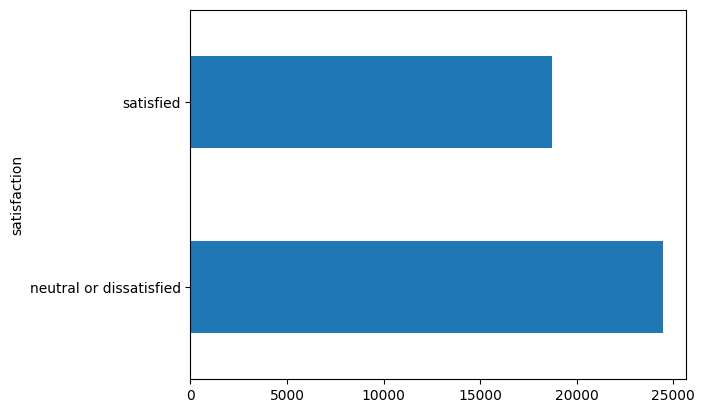

In [9]:
# check for class balance
df['satisfaction'].value_counts().plot(kind='barh')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Label encode the target variable
label_encoder = LabelEncoder()
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features X and target y, perform train-test split
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features, after train-test split to avoid data leakage
scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8712217718587145
F1 Score: 0.8471267528182568
ROC AUC Score: 0.8656266898996575
Confusion Matrix:
[[4442  453]
 [ 659 3081]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4895
           1       0.87      0.82      0.85      3740

    accuracy                           0.87      8635
   macro avg       0.87      0.87      0.87      8635
weighted avg       0.87      0.87      0.87      8635



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

# Evaluate each model using cross-validation with F1 score
results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    results.append({
        "Model": name,
        "Mean F1": cv_scores.mean(),
        "Std F1": cv_scores.std()
    })

results_df = pd.DataFrame(results)
results_df

Model   Mean F1    Std F1
0  Logistic Regression  0.851505  0.003678
1                 k-NN  0.896497  0.002001
2        Random Forest  0.947489  0.002422
3              XGBoost  0.950239  0.001842

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to try
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

best_params, best_f1_score